In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import array
from numpy import reshape
df = pd.read_csv('day.csv')

In [103]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
#Quick info regarding the dataset: cnt is the total number of bike users that day and is the sum of casual and registered users.

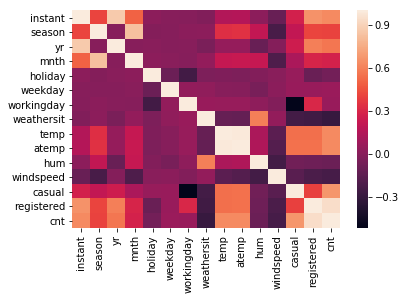

In [160]:
df.drop(['dteday','yr','temp'], axis=1)
sns.heatmap(df.corr())

In [ ]:
# This plot would ideally give us some basic overview if there are any variables that have a decent colleration.
#In our case it looks like the temperatur is a decent indicator for the total number of users that day.
#Therefore we are going to use these two indicators. I am using atemp in this case, which is just adjusted for feel.

In [144]:
X = df.iloc[:,10:11]
y = df.iloc[:,15:16]

In [134]:
#split the dataset into a training and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/4, random_state = 0)

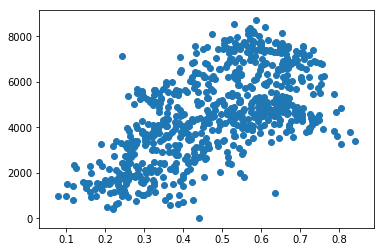

In [135]:
plt.scatter(X,y)

In [150]:
from sklearn.linear_model import LinearRegression
linModel = LinearRegression(n_jobs=-1)
linModel.fit(X_train, y_train)
confidence = linModel.score(X_test, y_test)
print(confidence)

0.39093687788564957


In [151]:
yhat = linModel.predict(X_test)